In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import Point
import xarray as xr
from pathlib import Path
from tqdm.auto import tqdm

from reservoirs_lshm.utils.metrics import KGEmod
from reservoirs_lshm.utils.plots import maps_performance

In [2]:
PATH_AFR = Path('Z:/nahaUsers/casadje/GloFASv5/stations/Africa')

<AxesSubplot:>

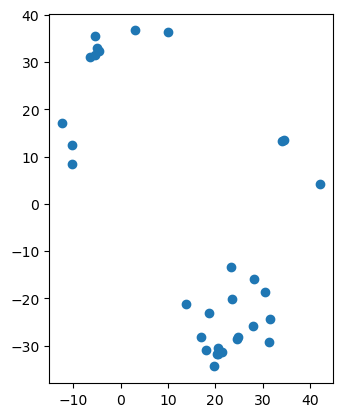

In [3]:
stations = pd.read_csv(PATH_AFR / 'Africa_candidate_stations_test_Gv4longtermRun.csv', index_col='ID')
stations = gpd.GeoDataFrame(
    data=stations,
    geometry=[Point(xy) for xy in zip(stations.lon, stations.lat)],
    crs='epsg:4326'
)

stations.plot()

In [4]:
observed = xr.open_mfdataset((PATH_AFR / 'discharge' / 'hDMS').glob('*.nc'))['discharge']
observed.close()
observed = observed.to_pandas()

observed.head()

ID,6569,6615,6622,6805,6807,6956,6969,6970,7204,7342,...,10066,10289,14558,14571,14572,14663,14721,14766,14827,17095
date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,1243.1,10.865,0.0,6.409,8.026,NaN,NaN,NaN,0.04,NaN,...,2.292,NaN,2.0,0.0,0.0,1.496,0.0,12.724,NaN,0.0
1979-01-02,1267.6,10.149,0.0,2.896,15.758,NaN,NaN,NaN,0.04,NaN,...,2.248,NaN,2.0,0.0,0.0,1.337,0.0,17.777,51.84,0.0
1979-01-03,1281.2,9.481,0.0,1.146,18.905,NaN,NaN,NaN,0.04,NaN,...,2.303,NaN,2.0,0.0,0.0,1.267,0.0,18.477,53.75,0.0
1979-01-04,1290.3,8.856,0.0,0.968,19.091,NaN,NaN,NaN,0.04,NaN,...,2.275,NaN,3.0,0.0,0.0,1.240,0.0,18.556,53.55,0.0
1979-01-05,1266.3,9.097,0.0,9.428,11.443,NaN,NaN,NaN,0.04,NaN,...,2.470,NaN,2.0,0.0,0.0,1.214,0.0,19.318,52.63,0.0


In [21]:
simulated = xr.open_mfdataset((PATH_AFR / 'discharge' / 'GloFAS4').glob('*.nc'))['dis24']
simulated.close()
simulated = simulated.to_pandas().transpose()

simulated.head()

id,6569,6615,6622,6805,6807,6956,6969,6970,7204,7342,...,10066,10289,14558,14571,14572,14663,14721,14766,14827,17095
valid_time,,,,,,,,,,,,,,,,,,,,,
1980-01-02,764.15625,0.640625,0.093750,208.593750,227.921875,1.562500,51.453125,26.734375,0.03125,71.281250,...,0.015625,315.531250,0.812500,0.015625,0.062500,0.218750,0.0,30.265625,55.546875,0.015625
1980-01-03,771.43750,0.484375,0.093750,235.921875,237.531250,1.265625,50.562500,26.250000,0.03125,70.953125,...,0.015625,311.453125,0.859375,0.015625,0.093750,0.171875,0.0,32.093750,53.734375,0.015625
1980-01-04,775.59375,0.375000,0.093750,228.812500,221.343750,1.031250,49.718750,25.781250,0.03125,70.640625,...,0.015625,306.890625,0.859375,0.015625,0.093750,0.140625,0.0,33.578125,51.984375,0.015625
1980-01-05,775.93750,0.296875,0.078125,208.609375,199.375000,0.859375,48.890625,25.312500,0.03125,70.312500,...,0.015625,301.875000,0.843750,0.015625,0.062500,0.125000,0.0,35.281250,50.265625,0.015625
1980-01-06,773.25000,0.250000,0.078125,187.937500,179.453125,0.734375,47.968750,24.812500,0.03125,70.000000,...,0.015625,296.656250,0.812500,0.015625,0.046875,0.109375,0.0,37.046875,48.578125,0.015625


In [27]:
metrics = ['KGE', 'alpha', 'beta', 'r']
stations[metrics] = np.nan
for ID in tqdm(stations.index):
    stations.loc[ID, metrics] = KGEmod(observed[ID], simulated[ID])

  0%|          | 0/32 [00:00<?, ?it/s]

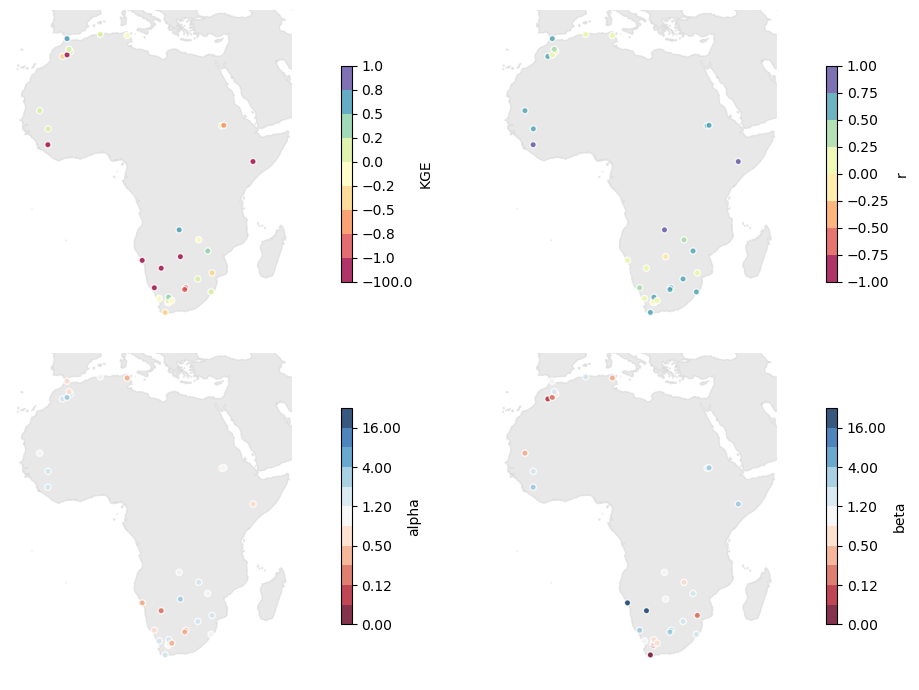

In [43]:
maps_performance(
    stations.geometry.x,
    stations.geometry.y,
    stations[metrics],
    s=20,
    extent=(-20, 52, -35, 37),
    save=PATH_AFR / 'map_performance.jpg'
)

In [45]:
stations.to_file(PATH_AFR / 'stations_Africa.shp')

In [48]:
import matplotlib.pyplot as plt

In [56]:
PATH_PLOTS = PATH_AFR / 'discharge' / 'plots'
PATH_PLOTS.mkdir(parents=True, exist_ok=True)

C:\Users\casadje\AppData\Local\Temp\ipykernel_22372\3430285889.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16, 4))


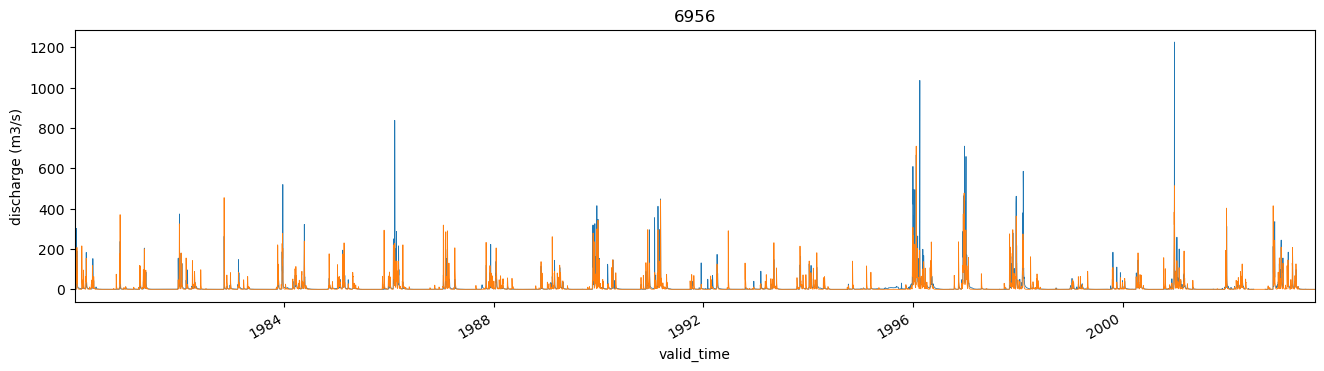

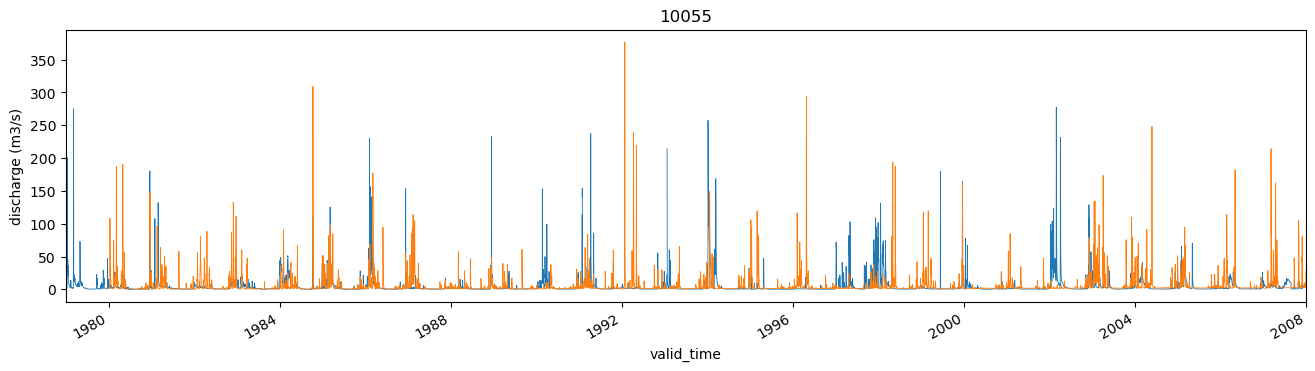

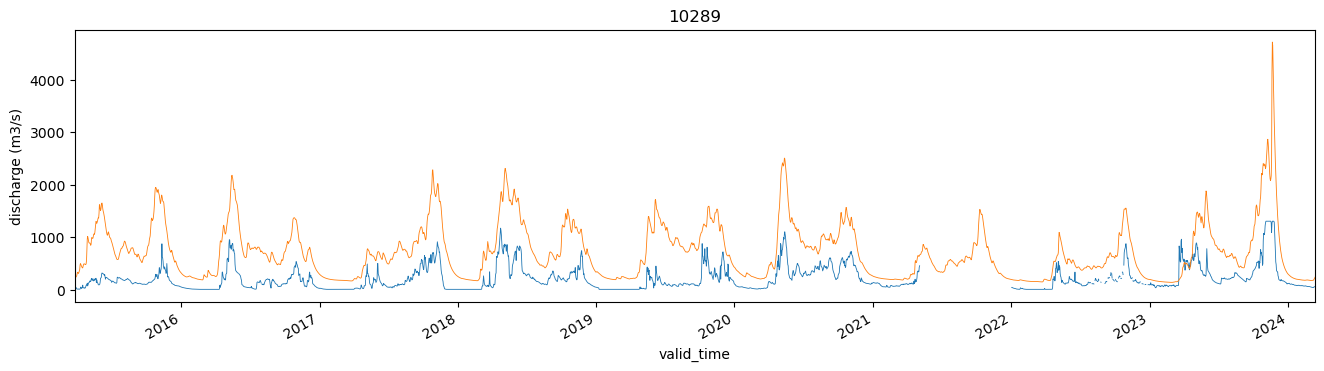

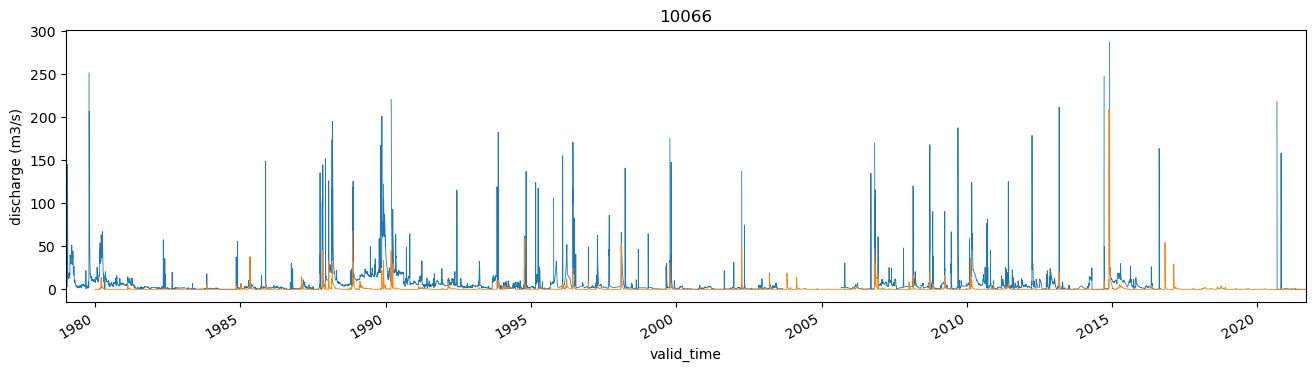

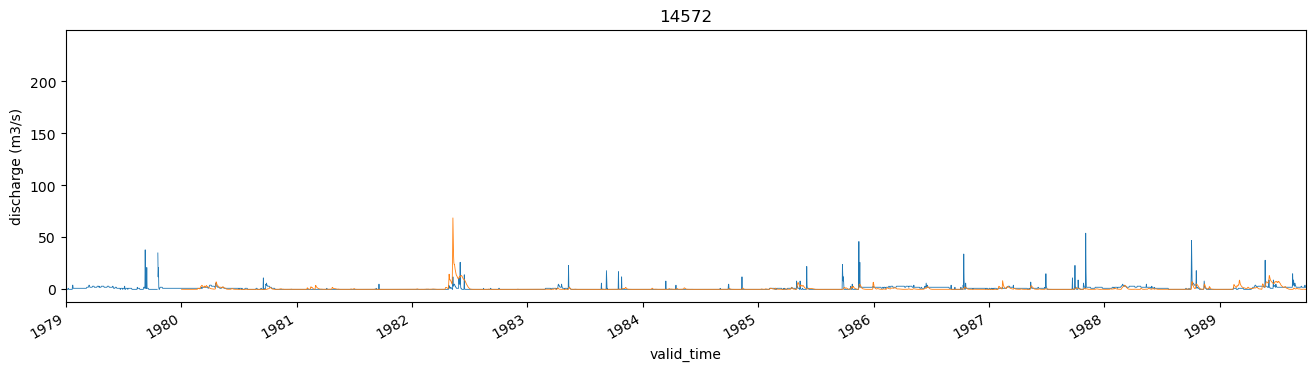

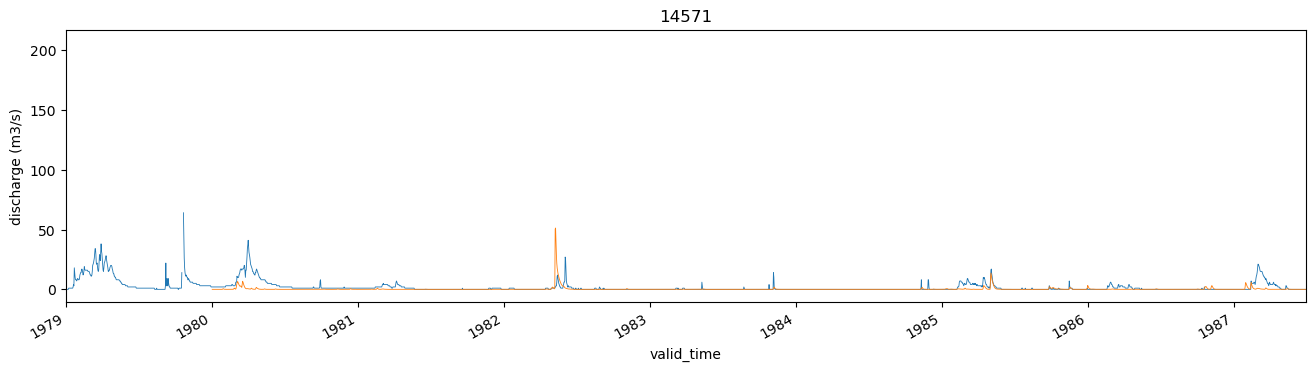

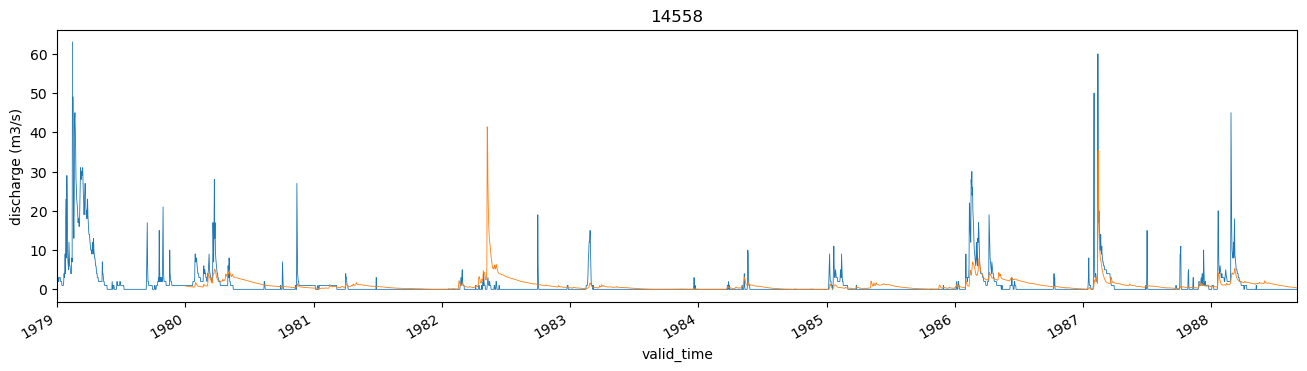

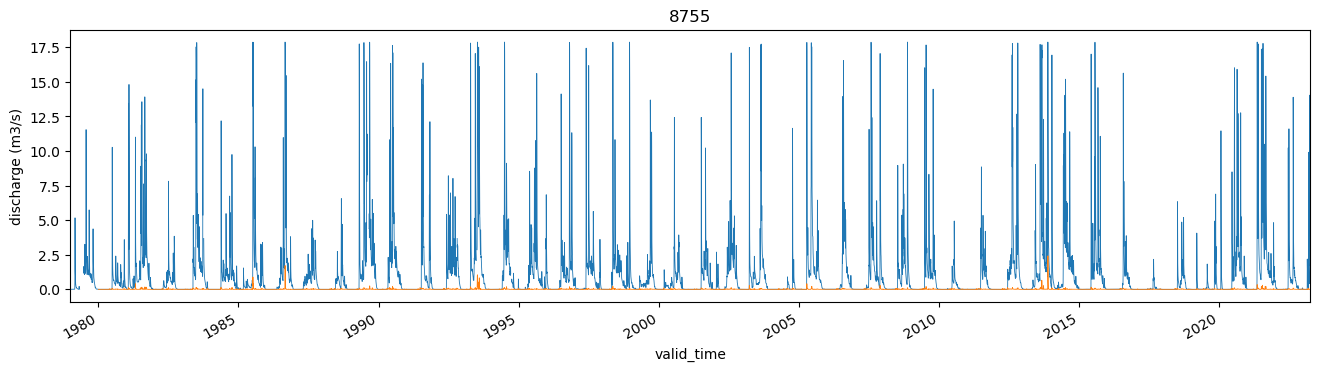

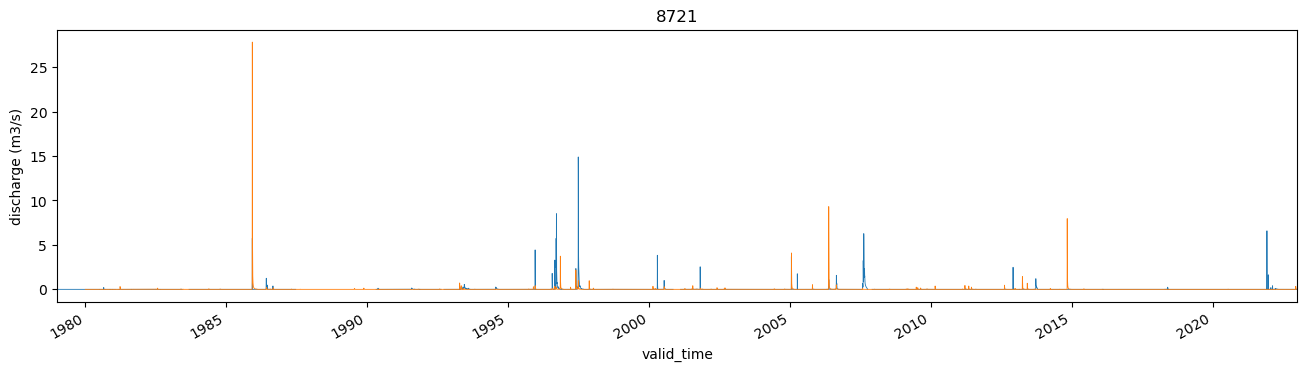

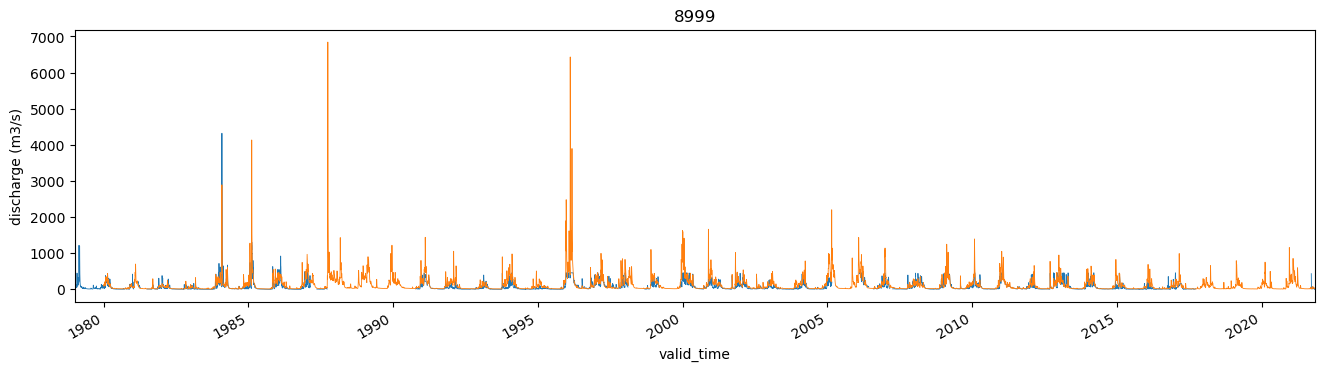

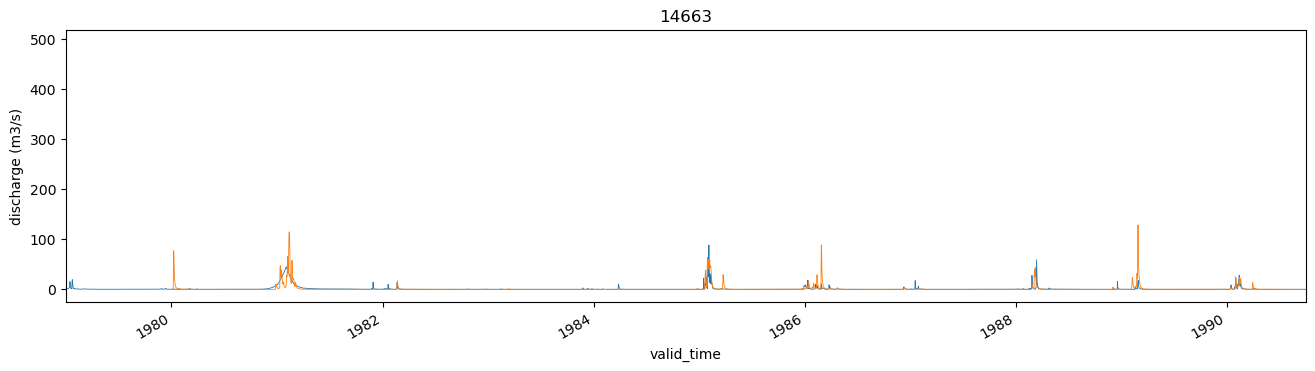

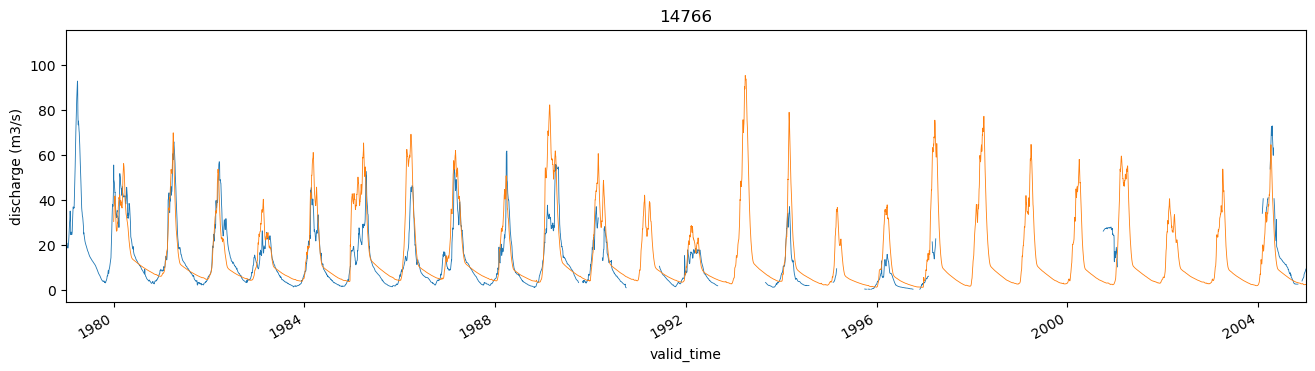

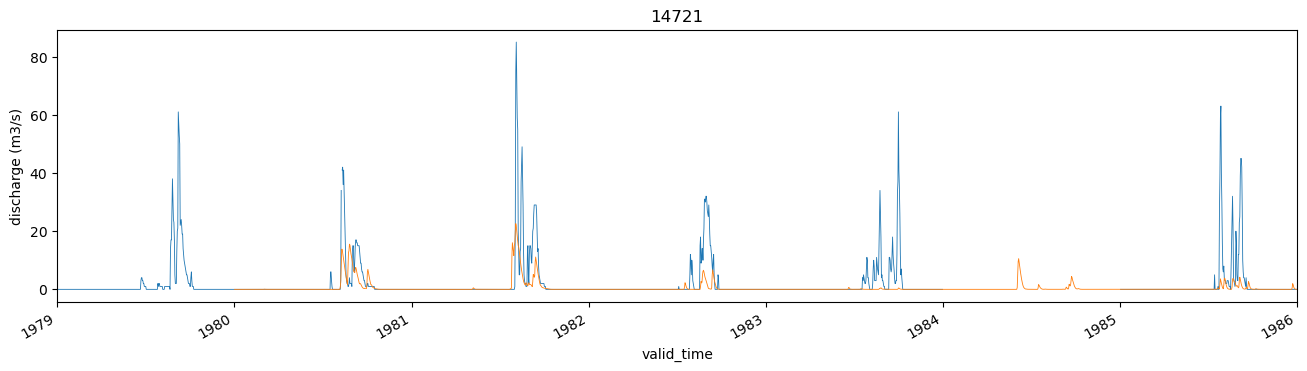

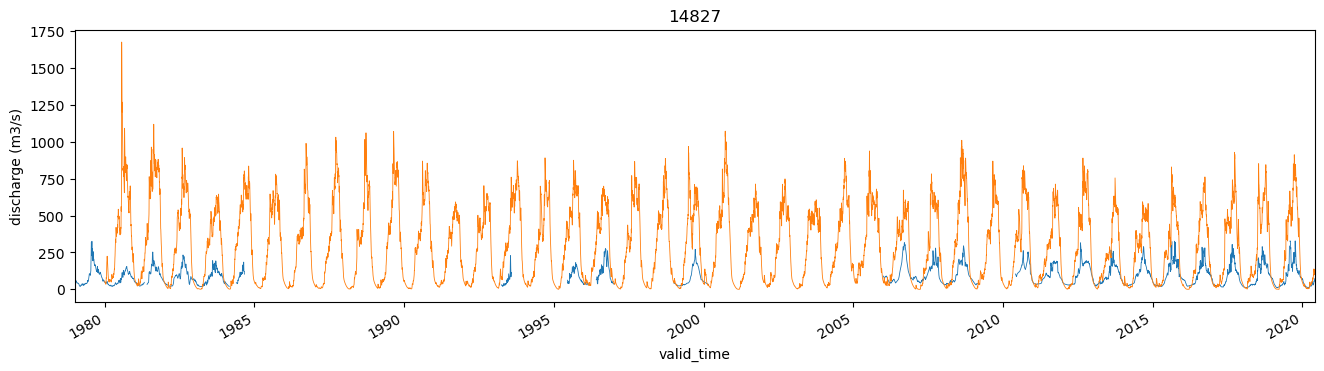

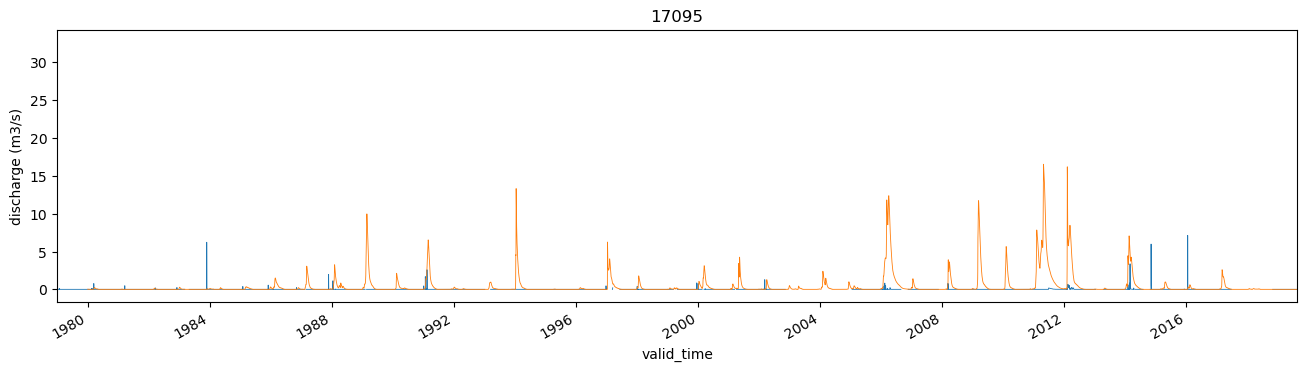

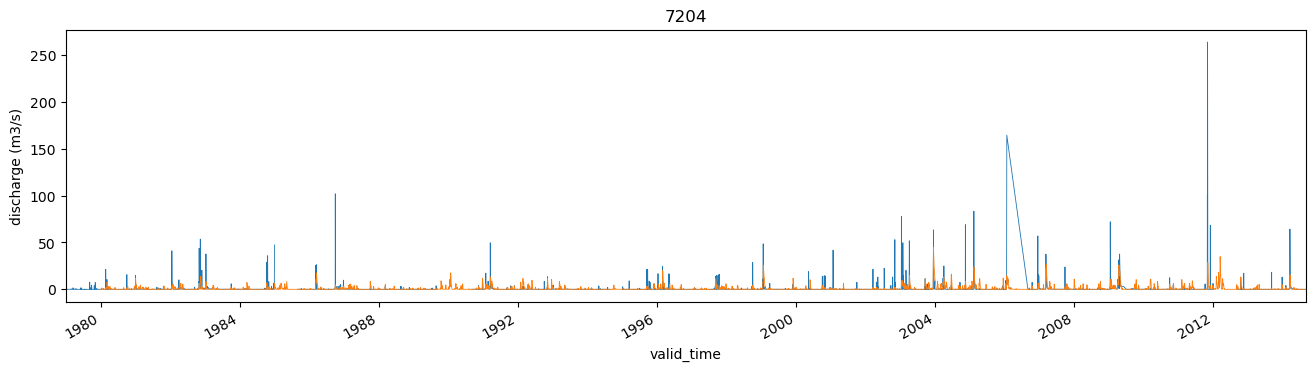

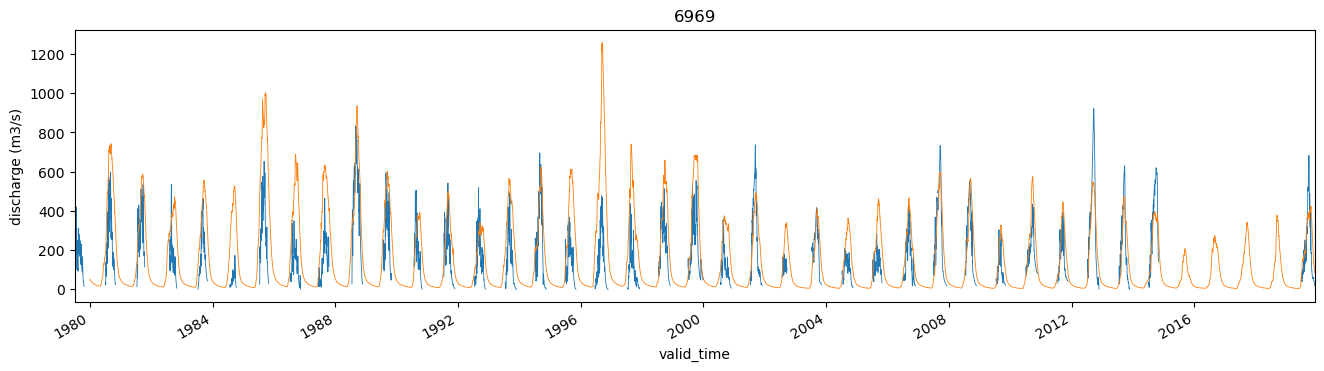

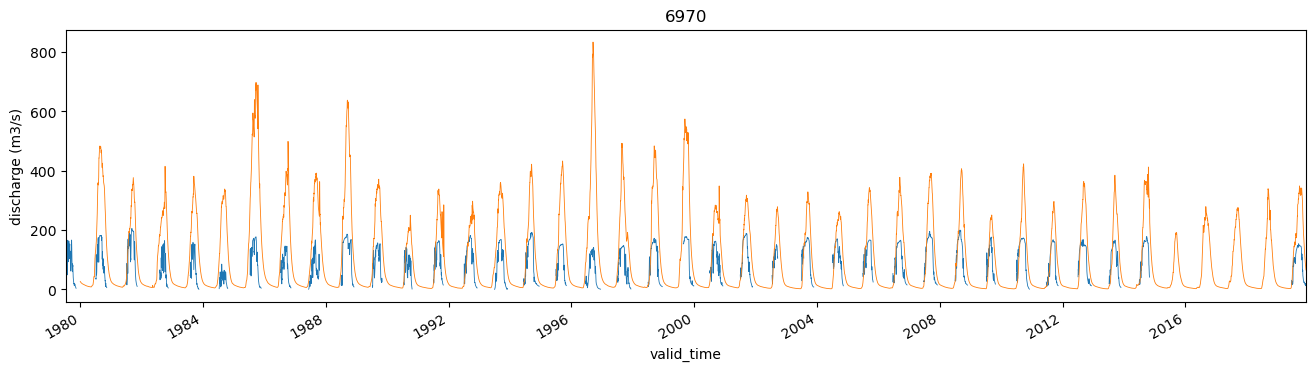

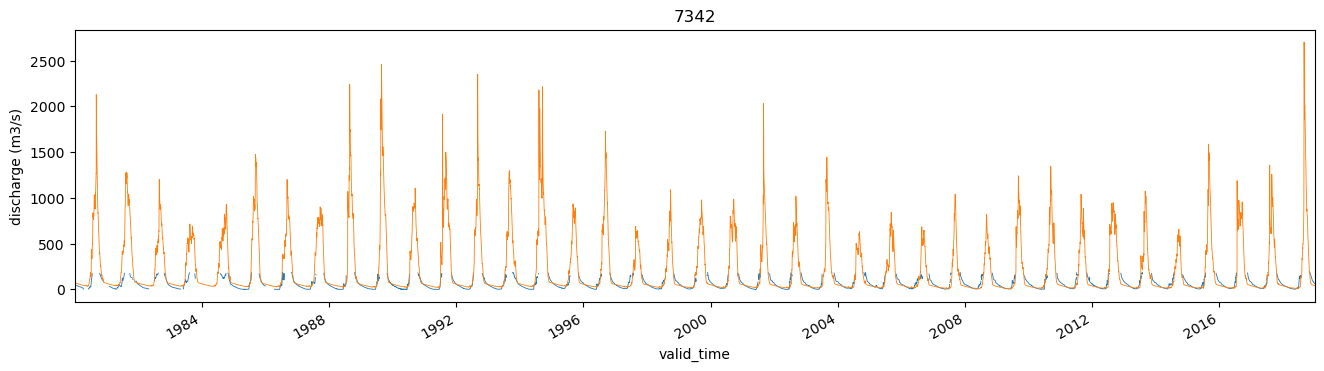

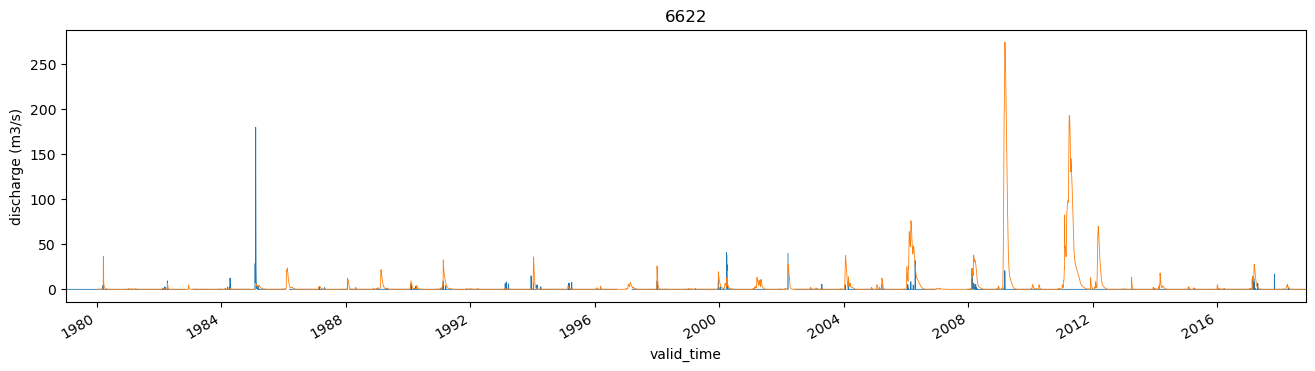

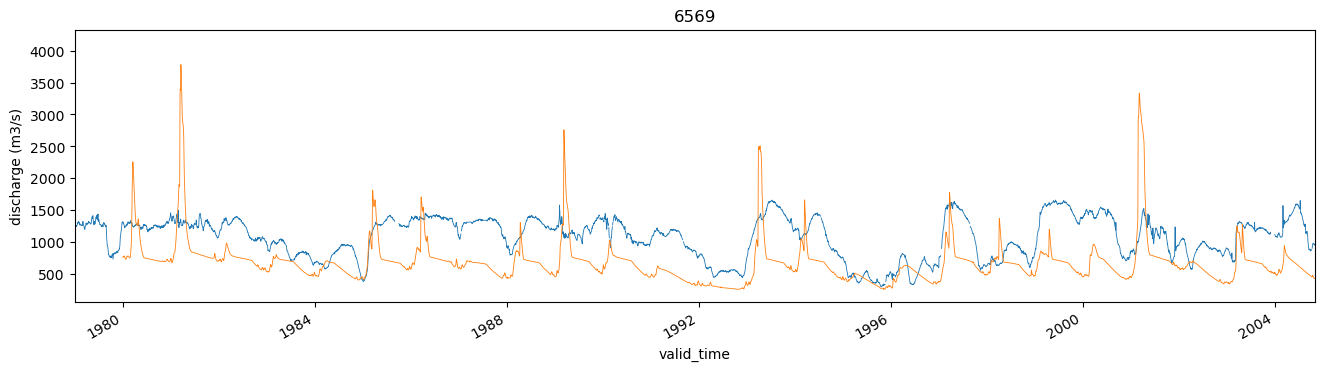

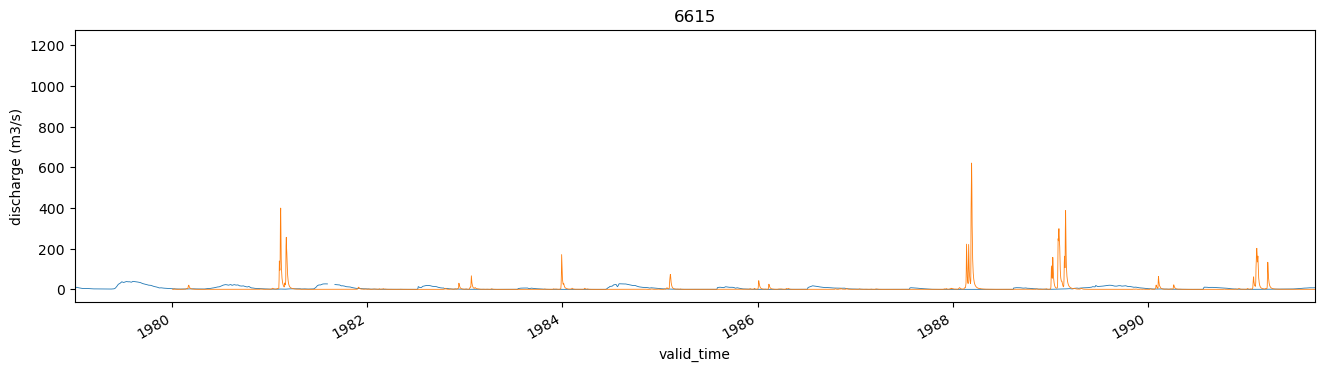

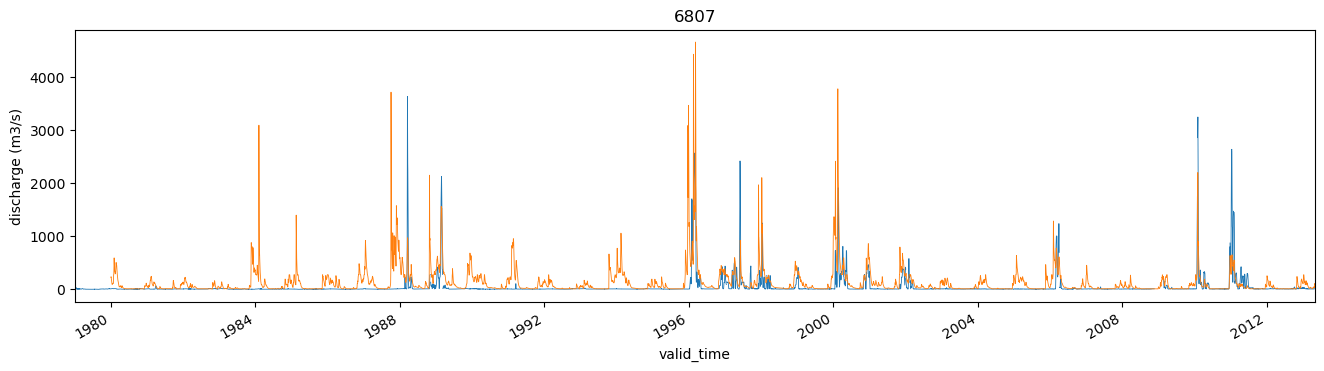

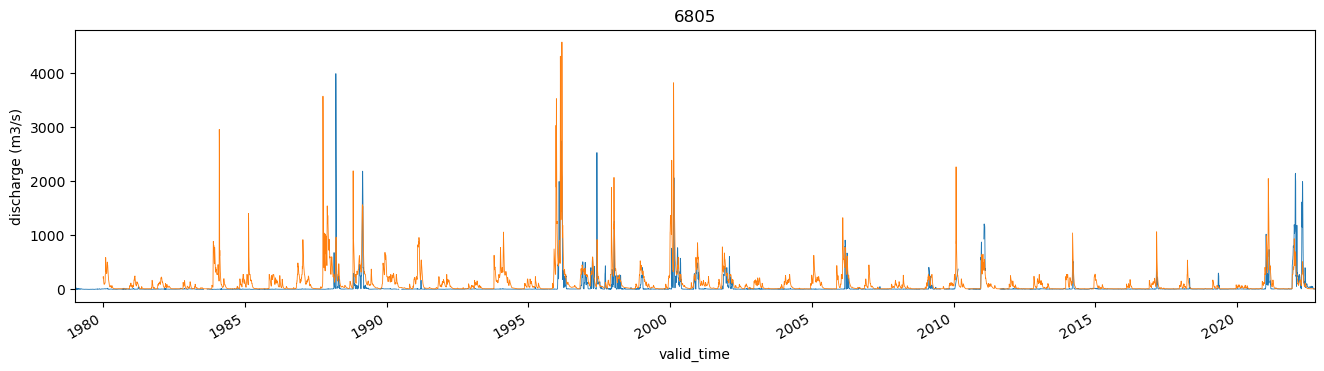

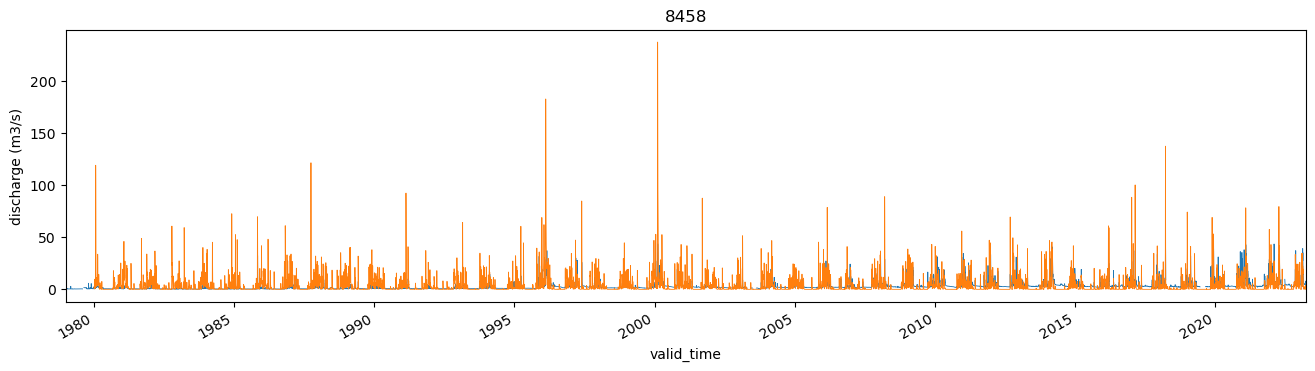

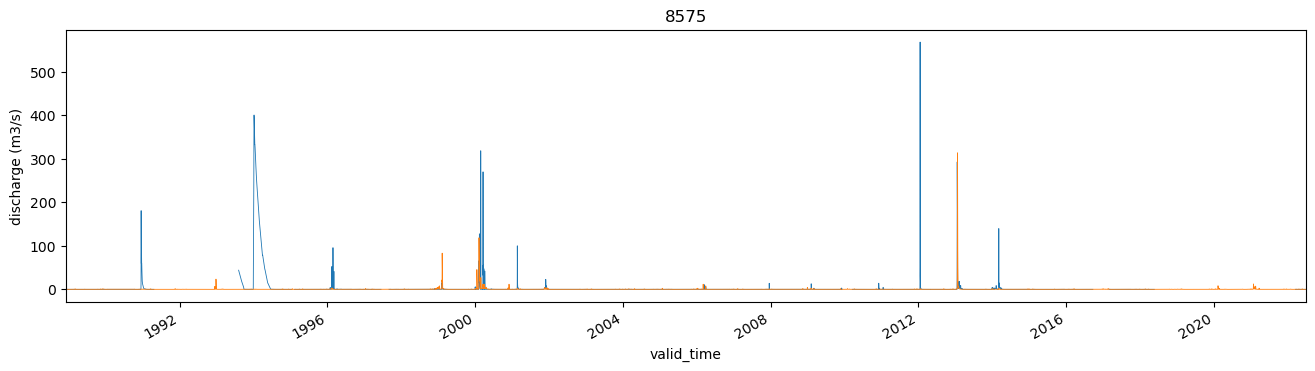

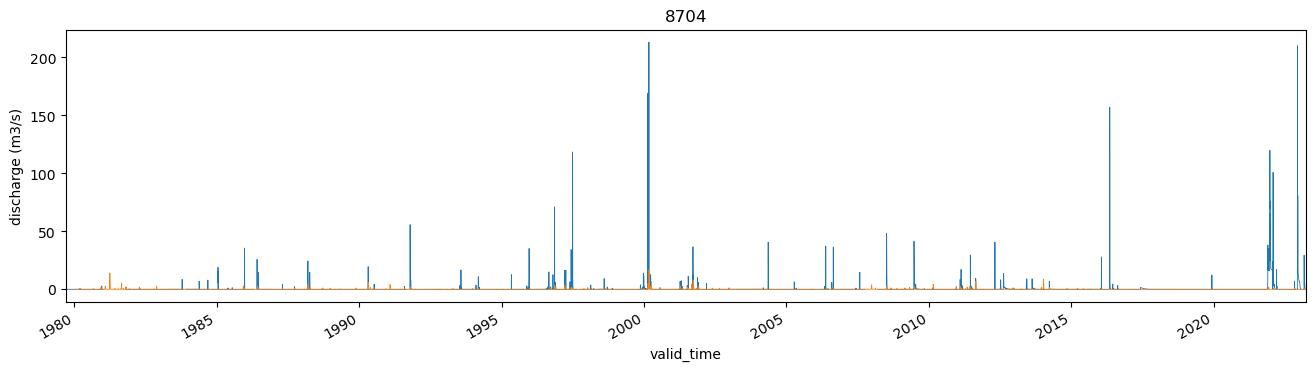

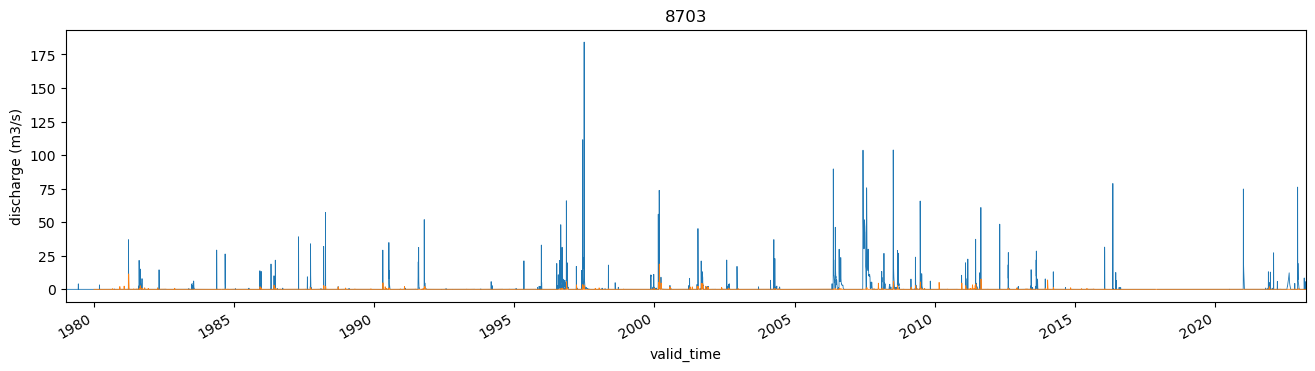

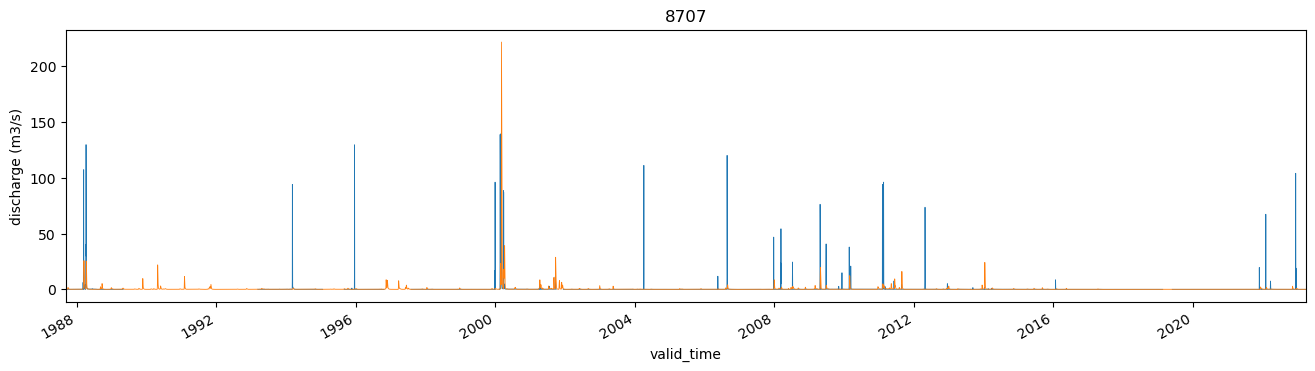

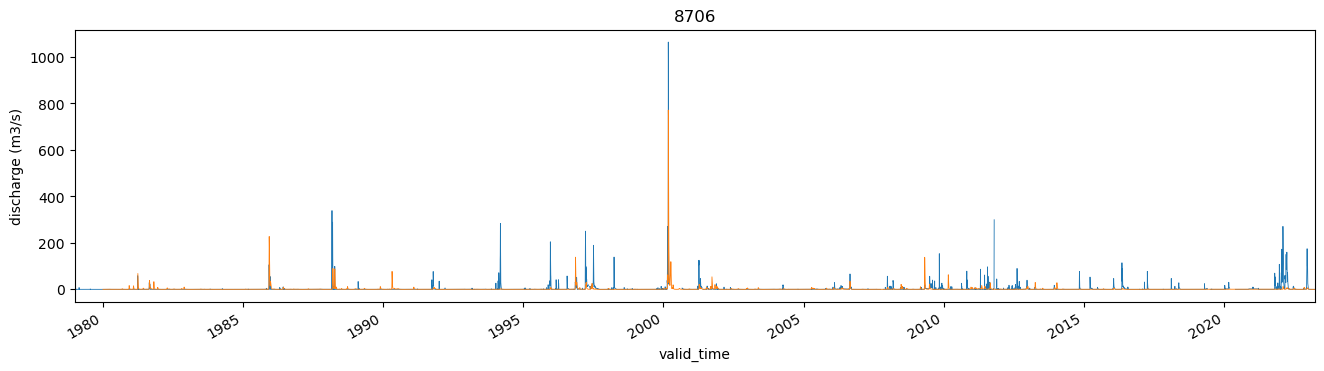

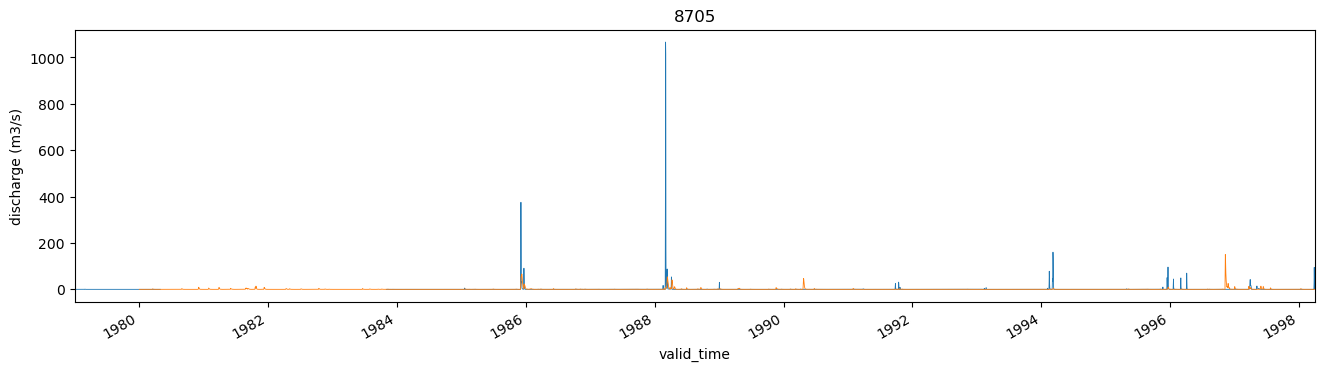

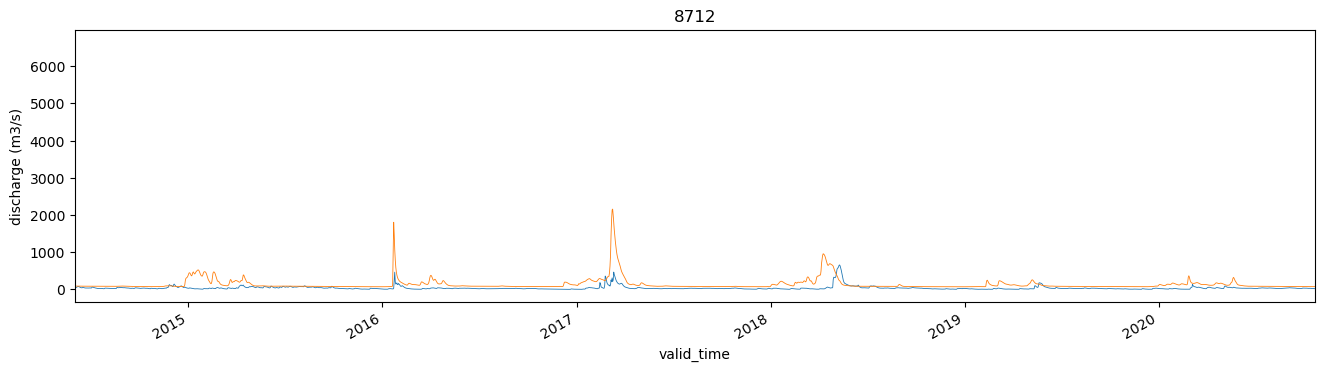

In [58]:
for ID in stations.index:

    fig, ax = plt.subplots(figsize=(16, 4))
    observed[ID].plot(ax=ax, lw=.6, label='observed')
    simulated[ID].plot(ax=ax, lw=.6, label='simulated')
    ax.set(
        xlim=(observed[ID].first_valid_index(), observed[ID].last_valid_index()),
        ylabel='discharge (m3/s)',
        title=ID
    );
    plt.savefig(PATH_PLOTS / f'{ID}.jpg', dpi=300, bbox_inches='tight')

In [59]:
path = Path('Z:/nahaUsers/casadje/GloFASv5/stations/Congo')

In [68]:
stations = pd.read_excel(path / 'analysis_trends.xlsx', usecols=['Xlisflood', 'Ylisflood', 'EFAS_id'])
stations.rename(columns={'EFAS_id': 'ID', 'Xlisflood': 'lon', 'Ylisflood': 'lat'}, inplace=True)
stations = stations[['lon', 'lat', 'ID']]
stations.to_csv(path / 'cutmaps' / 'stations.txt', sep='\t', header=None, index=None)